In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) =keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

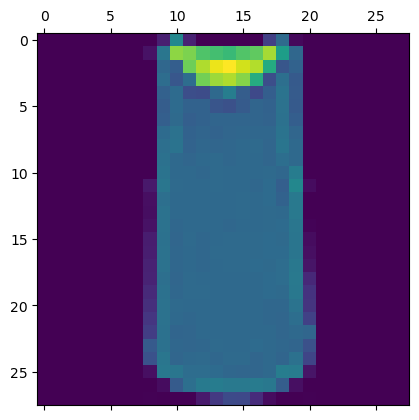

In [4]:
plt.matshow(x_train[2])

In [5]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [12]:
model=keras.Sequential([
    #input layer with 784 nodes
    #10 indicates possible outcomes
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)



Epoch 1/5


1875/1875 [==============================] - 5s 2ms/step - loss: 0.5985 - accuracy: 0.7979
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4605 - accuracy: 0.8422
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4353 - accuracy: 0.8507
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4222 - accuracy: 0.8544
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4128 - accuracy: 0.8567


In [13]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4540 - accuracy: 0.8433


[0.4539664685726166, 0.8432999849319458]

In [14]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([5.9852644e-04, 1.7294037e-04, 1.0851647e-02, 2.7540657e-03,
       5.4883817e-03, 9.9274391e-01, 2.2511058e-02, 9.8258334e-01,
       8.9559597e-01, 9.9566084e-01], dtype=float32)

In [15]:
import numpy as np
np.argmax(y_predicted[10])

4

In [16]:
y_test[10]

4

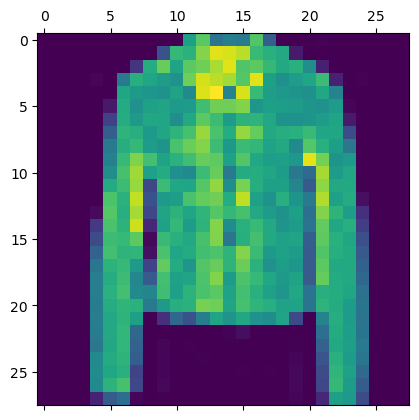

In [17]:
plt.matshow(x_test[10])

In [18]:
y_prediced_labels=[np.argmax(i) for i in y_predicted]
y_prediced_labels[:20]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0]

In [19]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_prediced_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[817,   3,  14,  50,   6,   0,  89,   0,  21,   0],
       [  2, 955,   5,  29,   4,   0,   3,   0,   2,   0],
       [ 21,   5, 741,  10, 133,   1,  72,   0,  17,   0],
       [ 23,  14,  15, 872,  27,   0,  41,   0,   8,   0],
       [  0,   2, 124,  42, 738,   0,  83,   0,  11,   0],
       [  0,   0,   0,   1,   0, 933,   0,  47,   5,  14],
       [143,   1, 137,  38,  92,   0, 549,   0,  40,   0],
       [  0,   0,   0,   0,   0,  39,   0, 947,   0,  14],
       [  2,   1,   5,  10,   2,   4,   8,   4, 964,   0],
       [  0,   0,   0,   0,   0,  28,   0,  53,   2, 917]])>

Text(50.722222222222214, 0.5, 'predicted')

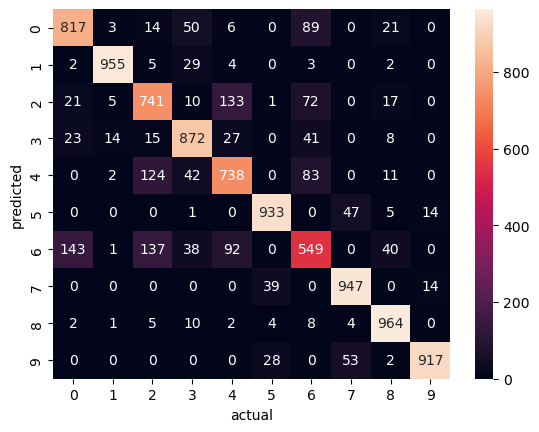

In [20]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('actual')
plt.ylabel('predicted')

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediced_labels))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1000
           1       0.97      0.95      0.96      1000
           2       0.71      0.74      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.74      0.74      0.74      1000
           5       0.93      0.93      0.93      1000
           6       0.65      0.55      0.60      1000
           7       0.90      0.95      0.92      1000
           8       0.90      0.96      0.93      1000
           9       0.97      0.92      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [22]:
model=keras.Sequential([
    #input layer with 784 nodes
    #100 indicates no. of nodes in hidden layer 1
    keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'),
    
    #hidden layer 1
#     200 indicates no. of nodes for hidden layer 2
    keras.layers.Dense(200,activation='sigmoid'),
    #     300 indicates no. of nodes for hidden layer 3
    keras.layers.Dense(300,activation='sigmoid'),
    #     400 indicates no. of nodes for hidden layer 4
    keras.layers.Dense(400,activation='sigmoid'),
    
    #hidden layer 2
#     10 possible outcomes
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.7270 - accuracy: 0.7228
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4460 - accuracy: 0.8414
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3933 - accuracy: 0.8593
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3616 - accuracy: 0.8693
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3387 - accuracy: 0.8775
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3247 - accuracy: 0.8817
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3082 - accuracy: 0.8867
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2979 - accuracy: 0.8902
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2862 - accuracy: 0.8949
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [23]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3531 - accuracy: 0.8734


[0.353092759847641, 0.8733999729156494]

In [24]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([1.8148948e-03, 2.4356472e-04, 1.7433859e-04, 4.8050256e-03,
       9.8501313e-03, 5.3586656e-01, 9.1018630e-03, 9.6206939e-01,
       2.3783489e-01, 9.9692160e-01], dtype=float32)

In [25]:
y_prediced_labels=[np.argmax(i) for i in y_predicted]
y_prediced_labels[:20]

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0]

In [26]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_prediced_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[795,   1,  16,  28,   1,   1, 147,   0,  11,   0],
       [  2, 960,   3,  28,   3,   0,   3,   0,   1,   0],
       [ 11,   1, 791,  13, 117,   0,  65,   0,   2,   0],
       [ 23,   7,  10, 899,  22,   0,  36,   0,   3,   0],
       [  1,   0,  82,  56, 812,   0,  49,   0,   0,   0],
       [  0,   0,   0,   1,   0, 963,   0,  27,   0,   9],
       [ 96,   1, 106,  27,  83,   0, 674,   0,  13,   0],
       [  0,   0,   0,   0,   0,  20,   0, 969,   0,  11],
       [  2,   0,   1,   7,   3,  10,   4,   5, 968,   0],
       [  0,   0,   0,   0,   0,  12,   1,  84,   0, 903]])>

Text(50.722222222222214, 0.5, 'predicted')

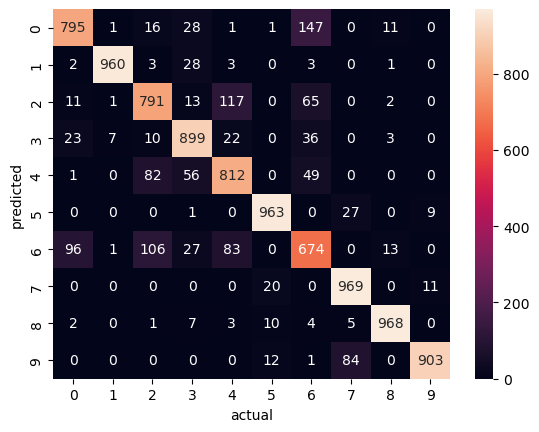

In [27]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('actual')
plt.ylabel('predicted')

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediced_labels))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.78      0.79      0.79      1000
           3       0.85      0.90      0.87      1000
           4       0.78      0.81      0.80      1000
           5       0.96      0.96      0.96      1000
           6       0.69      0.67      0.68      1000
           7       0.89      0.97      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.90      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

